# Test Model on Important Cases.

In [1]:
import numpy as np
np.random.seed(4917)
from keras.models import Model,load_model
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline
from test_environments import Environment1, Environment2, Environment3,Environment4,Environment5
%matplotlib inline
from time import time
from Settings import *
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
Environment={1:Environment1,2:Environment2,3:Environment3,4:Environment4,5:Environment5}
Direction={1:'E',2:'E',3:'E',4:'E',5:'E'}
##### IMPORTANT SELECT WHICH ENVIRONMENT YOU WANT TO TEST FROM HERE
env=1

Using Theano backend.


### Load the model

In [2]:
train_m=target_m = 207
#model = load_model('cur_mod/{}/model.h5'.format(train_m))
model = load_model('output/{}/MOD/target_model.h5'.format(target_m))

/home/aqeel/miniconda3/envs/py4/lib/python3.5/site-packages/keras/models.py:150: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
game=Environment[env]()
game.GenerateWorld()
AIAgent,DAgent = [game.agents[x] for x in game.agents]
AIAgent.Direction=DAgent.Direction= Direction[env]

Env:1,Should not go
Taken: 0.23941564559936523


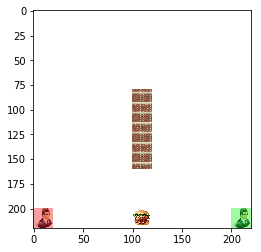

In [4]:
ax = plt.subplot(1,1,1)
ax.imshow(game.BuildImage())

plt.figure(figsize=(13,5))
#AIAgent.NextAction=Settings.PossibleActions[3]
game.Step()
ax = plt.subplot(1,3,1)
ax.imshow(game.BuildImage())
ax = plt.subplot(1,2,2)
ax.imshow(game.AgentViewPoint(AIAgent.ID))
ax = plt.subplot(1,2,2)
ax.imshow(game.AgentViewPoint(DAgent.ID))

In [5]:
def AddTextToImage(img,action,AgentView=0):
    img = np.array(img*255,dtype=np.uint8)
    img = Image.fromarray(img)
    #img = Image.fromarray(game.BuildImage())
    draw = ImageDraw.Draw(img)
    # font = ImageFont.truetype(<font-file>, <font-size>)
    font = ImageFont.truetype("LiberationSans-Bold.ttf", 12)
    # draw.text((x, y),"Sample Text",(r,g,b))
    if AgentView:
        draw.text((0, 0),"Action:{}".format(action),(255,0,0),font=font)
    else:
        draw.text((0, 0),"Action:{}".format(action),(0,0,0),font=font)
    return img

In [6]:
print('Testing Target Model')
TestingCounter=0
TestingCounter+=1
writer = skvideo.io.FFmpegWriter("Final_Results/VID_ENV_{}_Test_{}.avi".format(env,TestingCounter))
writer2 = skvideo.io.FFmpegWriter("Final_Results/VID_ENV_{}_TestAG_{}.avi".format(env,TestingCounter))
#game.GenerateWorld()
img = game.BuildImage()
game.Step()
plt.imsave('Final_Results/VID_ENV_{}_Test_{}.png'.format(env,TestingCounter),img)
Start = time()
episode_reward=0
observation = AIAgent.Flateoutput()

writer.writeFrame(AddTextToImage(game.BuildImage(),AIAgent.NextAction,0))
writer2.writeFrame(AddTextToImage(game.AgentViewPoint(AIAgent.ID),AIAgent.NextAction,1))
for t in range(1000):
    s =np.array([observation])
    q = model.predict(s, batch_size=1)
    action = np.argmax(q[0])
    #print(Settings.PossibleActions[action],action)
    AIAgent.NextAction = Settings.PossibleActions[action]
    print(AIAgent.NextAction)
    if env not in [4,5]:
        DAgent.DetectAndAstar()
    #print(DAgent.NextAction)
    game.Step()
    observation = AIAgent.Flateoutput()
    reward = AIAgent.CurrentReward
    #print(reward)
    done = game.Terminated[0]
    #observation, reward, done, info = env.step(action)
    episode_reward += reward
    writer.writeFrame(AddTextToImage(game.BuildImage(),'{},TR:{}'.format(AIAgent.NextAction,episode_reward),0))
    writer2.writeFrame(AddTextToImage(game.AgentViewPoint(AIAgent.ID),'{},TR:{}'.format(AIAgent.NextAction,episode_reward),1))
    if done:
        break

writer.close()
writer2.close()
Start = time()-Start
print(t)

Testing Target Model
[['L', 'S'], ['M', 'S']]
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
[['L', 'S'], ['M', 'S']]
[['L', 'E'], ['M', 'E']]
6
